In [29]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [3]:
nodes=10
graphRandom = np.random.rand(nodes,nodes)

In [5]:
graphRandom[graphRandom>0.25]=1
graphRandom[graphRandom<=0.5]=0
graph=graphRandom*np.transpose(graphRandom)
np.fill_diagonal(graph,0)

In [54]:
# Handmade lollipop graph.
graph = np.zeros((nodes, nodes), dtype=np.float32)
graph[0,1] = graph[1,2] = graph[2,3] = graph[3,4] = graph[4,5] = 1.
for ix in range(5,nodes):
    for jx in range(5,nodes):
        if ix != jx: graph[ix,jx] = 1
graph = np.maximum(graph, np.transpose(graph))
print(graph)

[[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  1.  1.  1.  1.]
 [ 0.  0.  0.  0.  0.  1.  0.  1.  1.  1.]
 [ 0.  0.  0.  0.  0.  1.  1.  0.  1.  1.]
 [ 0.  0.  0.  0.  0.  1.  1.  1.  0.  1.]
 [ 0.  0.  0.  0.  0.  1.  1.  1.  1.  0.]]


In [55]:
# print(np.sum(graph,axis=1))
# print(graph)
adjList = {}
for nx in range(nodes): adjList[nx] = set()
for ix in range(nodes):
    for jx in range(nodes):
        if graph[ix][jx] > .5:
            adjList[ix].add(jx)
            adjList[jx].add(ix)
print(adjList)

{0: {1}, 1: {0, 2}, 2: {1, 3}, 3: {2, 4}, 4: {3, 5}, 5: {8, 9, 4, 6, 7}, 6: {8, 9, 5, 7}, 7: {8, 9, 5, 6}, 8: {9, 5, 6, 7}, 9: {8, 5, 6, 7}}


In [56]:
def getRoots(aNeigh):
    def findRoot(aNode,aRoot):
        while aNode != aRoot[aNode][0]:
            aNode = aRoot[aNode][0]
        return (aNode,aRoot[aNode][1])
    myRoot = {} 
    for myNode in aNeigh.keys():
        myRoot[myNode] = (myNode,0)  
    for myI in aNeigh: 
        for myJ in aNeigh[myI]: 
            (myRoot_myI,myDepthMyI) = findRoot(myI,myRoot) 
            (myRoot_myJ,myDepthMyJ) = findRoot(myJ,myRoot) 
            if myRoot_myI != myRoot_myJ: 
                myMin = myRoot_myI
                myMax = myRoot_myJ 
                if  myDepthMyI > myDepthMyJ: 
                    myMin = myRoot_myJ
                    myMax = myRoot_myI
                myRoot[myMax] = (myMax,max(myRoot[myMin][1]+1,myRoot[myMax][1]))
                myRoot[myMin] = (myRoot[myMax][0],-1) 
    myToRet = {}
    for myI in aNeigh: 
        if myRoot[myI][0] == myI:
            myToRet[myI] = []
    for myI in aNeigh: 
        myToRet[findRoot(myI,myRoot)[0]].append(myI) 
    return myToRet

In [65]:
print(getRoots(adjList))
print("Number of edges ",sum(sum(graph>0))/2)
graph2 =np.array(graph)
for i in range(nodes):
    graph2[i] = graph2[i]/(np.sum(graph2[i])) 
print(graph2)

{1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}
Number of edges  15.0
[[ 0.    1.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.5   0.    0.5   0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.5   0.    0.5   0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.5   0.    0.5   0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.5   0.    0.5   0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.2   0.    0.2   0.2   0.2   0.2 ]
 [ 0.    0.    0.    0.    0.    0.25  0.    0.25  0.25  0.25]
 [ 0.    0.    0.    0.    0.    0.25  0.25  0.    0.25  0.25]
 [ 0.    0.    0.    0.    0.    0.25  0.25  0.25  0.    0.25]
 [ 0.    0.    0.    0.    0.    0.25  0.25  0.25  0.25  0.  ]]


In [72]:
def randomWalkFunction(graph,length,startNode):
    node=startNode
    path=[startNode]
    itr = 1
    while (itr<length):
        validNextMoves=np.where(graph[node]>0)
        if len(validNextMoves[0])==0:
            break
        nextMove=int(np.floor(np.random.rand()*len(validNextMoves[0])))
        path.append(validNextMoves[0][nextMove])
        node=validNextMoves[0][nextMove]
        itr+=1
    return path

walk length= 100000 100000


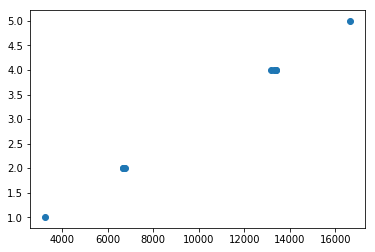

In [77]:
length=100000
randomStart = int(np.floor(np.random.rand()*nodes))
randomWalk = randomWalkFunction(graph,length,randomStart)
visitCounts = Counter()
for visit in randomWalk:
    visitCounts[visit] += 1
print('walk length=',len(randomWalk),length)
# verify if visitCounts proportional to degree
plt.scatter([visitCounts[nx] for nx in range(nodes)], [len(adjList[nx]) for nx in range(nodes)])
plt.show()

numU= 6661


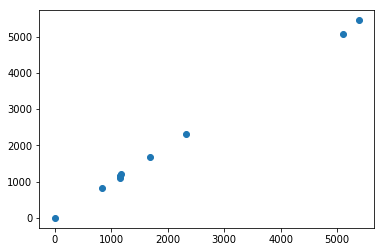

In [78]:
# compare left and right window node frequency histograms
T, u, numU = 3, 4, 0
leftNodeFreq, rightNodeFreq = Counter(), Counter()
for findU in range(len(randomWalk)):
    if u == randomWalk[findU]:
        numU += 1
        for findV in range(max(0,findU-T), findU):
            leftNodeFreq[randomWalk[findV]] += 1
        for findV in range(findU+1, min(findU+T+1, len(randomWalk))):
            rightNodeFreq[randomWalk[findV]] += 1
print('numU=', numU)
plt.scatter([leftNodeFreq[nx] for nx in range(nodes)], [rightNodeFreq[nx] for nx in range(nodes)])
plt.show()

In [76]:
windowSize = 6
U, V = 3, 4

#Q1 : Each ooccurance of random walk
pointersOfNodes={}

for i in range(nodes):
    pointersOfNodes[i]=[]
u=U
def occuranceOf(randomWalk,windowSize):
    context={}
    focus={}
    for i in range(nodes):
        context[i]=[]
        focus[i]=[]
    for i in range(windowSize,len(randomWalk)-windowSize):
        pointersOfNodes[randomWalk[i]].append(i)
        if randomWalk[i]==u:
            context[randomWalk[i]].append(np.array(randomWalk[i-windowSize:i+windowSize+1]))
            pointersOfNodes[randomWalk[i]].append(i)
            focus[randomWalk[i]].append(np.array(randomWalk[i-windowSize:i+windowSize+1]))
    return context,focus

context,focus=occuranceOf(randomWalk,windowSize)

nodesOccurance={}
for i in range(nodes):
    if i != u:
        continue
    count=0
    temp=context[i]
    for cont in temp:
        count+=len(cont)-1
    temp=focus[i]
    for cont in temp:
        count+=len(cont)-1
    
    nodesOccurance[i]=float(count)/len(temp)
    

In [10]:
#Q2: Probablity of walk starting at node u will vist node v
u=U
v=V
t=windowSize
def probablityOfPath(u,v,randomWalk,t,pointersOfNodes):
    count=0
    for ptr in pointersOfNodes[u]:
        if randomWalk[ptr+t]==v:
            count+=1
    return float(count)/len(pointersOfNodes[u]),float(count),len(pointersOfNodes[u])

print(probablityOfPath(u,v,randomWalk,t,pointersOfNodes))

def theoretical(u,v,t,graph2):
    oneHot=[0]*nodes
    oneHot[u]=1
    oneHot = np.transpose(oneHot)
#     np.linalg.matrix_power(graph2,t)
    return np.dot(oneHot,np.linalg.matrix_power(graph2,t))

print(theoretical(u,v,t,graph2)[v])

(0.005763262893453525, 78.0, 13534)
0.00626578738872


In [11]:
randomWalk[0:5]

[9, 94, 91, 2, 92]

In [12]:
#Q3 Expected number of times node v is visited with t steps of Node U
u=U
v=V
t=windowSize
def ExpectedSimulation(u,v,randomWalk,windowSize,pointersOfNodes):
    count=0
    for ptr in pointersOfNodes[u]:
        if v in randomWalk[ptr:ptr+windowSize+1]:
            count+=1
    return float(count)/len(pointersOfNodes[u]),float(count),len(pointersOfNodes[u])

print(ExpectedSimulation(u,v,randomWalk,t,pointersOfNodes))

def ExpectedTheoretical(u,v,T,graph2):
    count=0
    for t in range(1,T+1):
        count+=theoretical(u,v,t,graph2)[v]
    return count
print(ExpectedTheoretical(u,v,t,graph2))

(0.0297029702970297, 402.0, 13534)
0.0308636371182


In [18]:
#Question 4: Skipgram softmax
t=windowSize
u=U
v=V

def beforeTStepOccurance(u,v,randomWalk,windowSize,pointersOfNodes):
    count=0
    for ptr in pointersOfNodes[u]:
        if v in randomWalk[ptr-windowSize:ptr]:
            count+=1
    return float(count)/len(pointersOfNodes[u]),float(count),len(pointersOfNodes[u])

def withinWindow(u,v,randomWalk,windowSize,pointersOfNodes):
    count=0
    for ptr in pointersOfNodes[u]:
        if v in randomWalk[ptr-windowSize:ptr+windowSize+1]:
            count+=np.sum(np.array(randomWalk[ptr-windowSize:ptr+windowSize+1])==v)
          
    return float(count)/(2*windowSize*len(pointersOfNodes[u])),float(count),len(pointersOfNodes[u])

prob,countUandV,uCount=withinWindow(u,v,randomWalk,t,pointersOfNodes)


withinTSteps = ExpectedTheoretical(u,v,t,graph2)
beforeTSteps =0
for t in range(1,windowSize):
    beforeTSteps += beforeTStepOccurance(u,v,randomWalk,t,pointersOfNodes)[0]
print(prob)
print(withinTSteps/float(windowSize))

0.005024383035318457
0.0051439395197


0.010048766070636914

0.030863637118171579

In [23]:
USet=[3,6,7,8]
VSet=[1,5,4]
WindowSizeArray=[2,3,4,5,6]

# USet=[3]
# VSet=[4]
# WindowSizeArray=[4]

for u1 in USet:
    for v1 in VSet:
        for w in WindowSizeArray:
            print(u1,v1,w)
            u=u1
            v=v1
            t=w
            print("Q2")
            print("Simulation ",probablityOfPath(u,v,randomWalk,t,pointersOfNodes)[0])
            print(theoretical(u,v,t,graph2)[v])
            
            print("===========================")
            print("Q3")
            print("Simulation ",ExpectedSimulation(u,v,randomWalk,t,pointersOfNodes)[0])
            print(ExpectedTheoretical(u,v,t,graph2))
            
            print("===========================")
            print("Q4")
            
            prob,countUandV,uCount=withinWindow(u,v,randomWalk,t,pointersOfNodes)
            
            withinTSteps = ExpectedTheoretical(u,v,t,graph2)
            beforeTSteps =0
            for t in range(1,windowSize):
                beforeTSteps += beforeTStepOccurance(u,v,randomWalk,t,pointersOfNodes)[0]
            
            print ("Simulation   ", prob)
            print ("Solution1    ", (beforeTSteps+withinTSteps)/(2*t))
            print ("P(u,v,t)/t   " ,withinTSteps/float(t) )
            
            print("\n------------------------------------\n\n\n")


3 1 2
Q2
Simulation  0.006797694694842618
0.00608310197803
Q3
Simulation  0.01891532436825772
0.0181312947491
Q4
Simulation    0.00956849416284912
Solution1     0.0155415172391
P(u,v,t)/t    0.00362625894982

------------------------------------



3 1 3
Q2
Simulation  0.0065021427515885915
0.00666370059574
Q3
Simulation  0.025417467119846313
0.0247949953449
Q4
Simulation    0.008965075612038817
Solution1     0.0162078872986
P(u,v,t)/t    0.00495899906897

------------------------------------



3 1 4
Q2
Simulation  0.007241022609723659
0.00657784419144
Q3
Simulation  0.032510713757942955
0.0313728395363
Q4
Simulation    0.00868183833308704
Solution1     0.0168656717178
P(u,v,t)/t    0.00627456790726

------------------------------------



3 1 5
Q2
Simulation  0.0053199349785724845
0.00658424685813
Q3
Simulation  0.03723954485000739
0.0379570863944
Q4
Simulation    0.008009457662184128
Solution1     0.0175240964036
P(u,v,t)/t    0.00759141727889

------------------------------------

